# Graphs

<hr style="clear:both">
This notebook creates graphs that show the performances of our simulation. This way, we are able to compare different simulation under different conditions. For example, we can play with the objectives (minimize waiting time, detour time or maximize assignment), change the maximum waiting/detour time or change the fleet size. This is the code that will create the graphs in our report.

**Authors:** [Lorenzo Ballinari](https://people.epfl.ch/lorenzo.ballinari), [Paulo Alexandre Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

<hr style="clear:both">

## Librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

%run regression.ipynb

## Import the right datas

Choose what and how you want to see by initiate the following variables and where you want to save it.

In [2]:
objectif_function = 'maximize assignment, sharing' # can be : 'detour time', 'detour time reduce', 'waiting time', 'maximize assignment, sharing' or 'maximize assignment, fleet'
version = 'separate' # algo -> 'same_time' or 'separate'
extension = '' # extension de nom de fichier -> '_s_t' or ''
total_requests = 31500 # normal : 31500 | reduce : 7850
base_fleet = 2000 # normal : 2000 | reduce : 500

# display parameter
size = [8, 4] # size of graphs, except the occupancy
size_occupancy = [6.5, 8] # size of graph, occupancy
quality = 100 # quality of graphs

# name of folder where plots will be save
name_folder = 'max_assignment_willingness_to_share' # 'waiting_time', 'detour_time', 'detour_time_reduce', 'max_assignment_fleet', 'max_assignment_willingness_to_share'

# regression
regression = 'poly' #type of regression : 'exp', 'log' or 'poly'
deg = 2

In [3]:
correction = False

if objectif_function == 'detour time':
    results_number = ['3_min',3,'3_max',4,5,6]
    x = [3,5,7,10,15,20]
    title_x = 'max. detour time [min]'
    base_fleet_size = [base_fleet for i in range(len(results_number))] 
    
if objectif_function == 'waiting time':
    results_number = ['7_min',7,'7_max',8,9,10]
    x = [3,5,7,9,12,15]
    title_x = 'max. waiting time [min]'
    base_fleet_size = [base_fleet for i in range(len(results_number))] 
    
if objectif_function == 'maximize assignment, sharing':
    results_number = [11,12,13]
    x = [0,50,100]
    title_x = 'willingness to share [%]'
    correction=True
    base_fleet_size = [base_fleet for i in range(len(results_number))] 
    
if objectif_function == 'detour time reduce':
    results_number = ['1_min_reduce','1_reduce','1_max_reduce','2_reduce','3_reduce', '4_reduce']
    x = [3,5,7,10,15,20]
    title_x = 'max. detour time [min]'
    base_fleet_size = [base_fleet for i in range(len(results_number))] 

if objectif_function == 'maximize assignment, fleet':
    results_number = [14,15,16]
    x = [1800,2000,2300]
    base_fleet_size = [1800,2000,2300]
    title_x = 'fleet size [veh]'

In [4]:
mean_waiting_times = []
mean_detour_times = []
percentage_sharings = []
abandonments = []
occupancies_0 = []
occupancies_1 = []
occupancies_2 = []

i=0

for number in results_number:
    Occupancy_perf = np.load(f"Results_{version}/condition_{number}/Occupancy_perf_condition_{number}{extension}.npy")
    Abandonment_perf = np.load(f"Results_{version}/condition_{number}/Abandonment_perf_condition_{number}{extension}.npy")
    Waiting_time_perf = np.load(f"Results_{version}/condition_{number}/Waiting_time_perf_condition_{number}{extension}.npy")
    Detour_time_perf = np.load(f"Results_{version}/condition_{number}/Detour_time_perf_condition_{number}{extension}.npy")
    
    mean_waiting_time = np.mean(Waiting_time_perf)
    mean_waiting_times = np.append(mean_waiting_times, mean_waiting_time*60)
    
    mean_detour_time = np.mean(Detour_time_perf)
    mean_detour_times = np.append(mean_detour_times, mean_detour_time*60)
    
    number_request_total = len(Waiting_time_perf)
    number_request_shared = len(Detour_time_perf)
    percentage_sharing = number_request_shared/number_request_total
    percentage_sharings = np.append(percentage_sharings, percentage_sharing*100)
    
    abandonment = Abandonment_perf[-1]
    abandonments = np.append(abandonments, (abandonment/total_requests)*100)
    
    occupancies_0 = np.append(occupancies_0, (np.mean(Occupancy_perf[0,:])/base_fleet_size[i])*100)
    occupancies_1 = np.append(occupancies_1, (np.mean(Occupancy_perf[1,:])/base_fleet_size[i])*100)    
    occupancies_2 = np.append(occupancies_2, (np.mean(Occupancy_perf[2,:])/base_fleet_size[i])*100)
    
    i+=1

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
if correction :
    mean_detour_times[0]=0
    
print('Résumé des résultats \n','mean_waiting_times :',mean_waiting_times,'\n','mean_detour_times :', mean_detour_times,'\n', 'percentage_sharings :',percentage_sharings, '\n','abandonments :',abandonments, '\n','occupancies_0 :',occupancies_0, '\n','occupancies_1 :',occupancies_1, '\n','occupancies_2 :',occupancies_2)

Résumé des résultats 
 mean_waiting_times : [1.87067196 2.08055902 2.36134136] 
 mean_detour_times : [0.         4.89848052 5.11607164] 
 percentage_sharings : [ 0.         22.92985188 44.84010702] 
 abandonments : [6.96507937 4.12698413 0.01904762] 
 occupancies_0 : [21.25159796 18.47348309 15.72721167] 
 occupancies_1 : [78.74840204 72.44367763 64.12063455] 
 occupancies_2 : [ 0.          9.08283928 20.15215377]


## Graphs

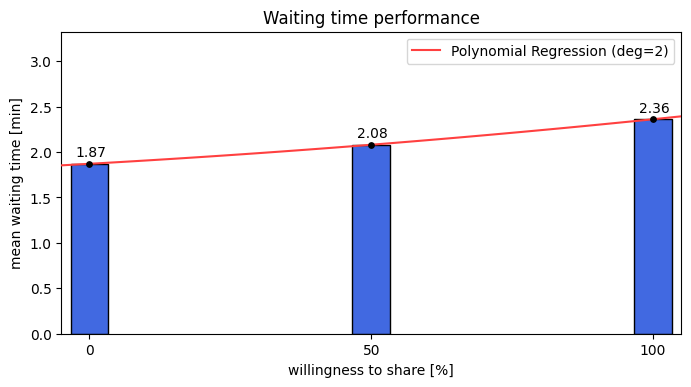

In [12]:
type_graph = 'waiting_time'

plt.figure(1, dpi=quality, figsize=size)
plt.bar(x, mean_waiting_times, width = (x[-1]-x[0])/15, color='#4169E1',edgecolor='k',zorder=0)
plt.xticks(x)
plt.title('Waiting time performance')
plt.xlabel(title_x)
plt.ylabel('mean waiting time [min]')
plt.xlim(x[0]-(x[-1]-x[0])/15,x[-1]+(x[-1]-x[0])/15)
plt.ylim(0,max(mean_waiting_times)+max(mean_waiting_times)/3)

for i in range(len(x)):
    index = x[i]
    value = mean_waiting_times[i]
    plt.text(index-(x[-1]-x[0])/40,value+max(mean_waiting_times)/30, str(f'{value:.2f}'))

dx=(x[-1]-x[0])/5
if regression == 'log':
    regression_log(x, mean_waiting_times, deg, False, 'Waiting time performance', 'mean waiting time [min]',dx)
if regression == 'exp':
    regression_exp(x, mean_waiting_times, deg, False, 'Waiting time performance', 'mean waiting time [min]',dx)
if regression == 'poly':
    regression_poly(x, mean_waiting_times, deg, False, 'Waiting time performance', 'mean waiting time [min]',dx)

#plt.savefig(f'graphs_{version}/{name_folder}/{type_graph}')    

plt.show()

### Detour time

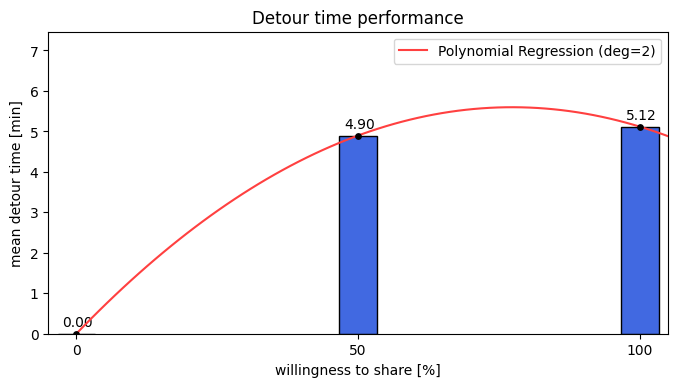

In [13]:
type_graph = 'detour_time'

plt.figure(2, dpi=quality, figsize=size)
plt.bar(x, mean_detour_times, width = (x[-1]-x[0])/15,color='#4169E1',edgecolor='k',zorder=0)
plt.xticks(x)
plt.title('Detour time performance')
plt.xlabel(title_x)
plt.ylabel('mean detour time [min]')
plt.xlim(x[0]-(x[-1]-x[0])/15,x[-1]+(x[-1]-x[0])/15)
plt.ylim(0,max(mean_detour_times)+max(mean_detour_times)/3)

for i in range(len(x)):
    index = x[i]
    value = mean_detour_times[i]
    plt.text(index-(x[-1]-x[0])/40,value+max(mean_detour_times)/30, str(f'{value:.2f}'))

dx=(x[-1]-x[0])/5
if regression == 'log':
    regression_log(x, mean_detour_times, deg, False, 'Detour time performance', 'mean detour time [min]',dx)
if regression == 'exp':
    regression_exp(x, mean_detour_times, deg, False, 'Detour time performance', 'mean detour time [min]',dx)
if regression == 'poly':
    regression_poly(x, mean_detour_times, deg, False, 'Detour time performance', 'mean detour time [min]',dx)

#plt.savefig(f'graphs_{version}/{name_folder}/{type_graph}')

plt.show()    

### % of shared trips

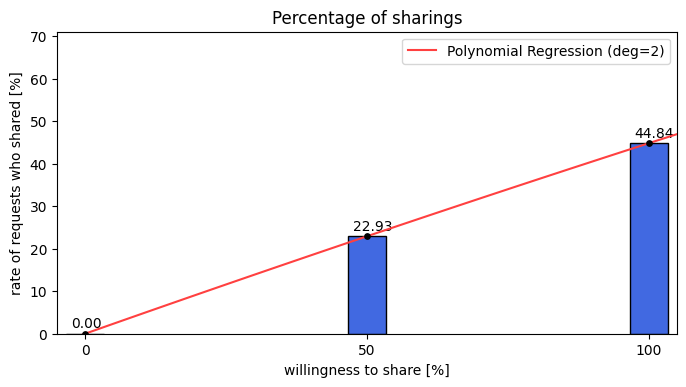

In [14]:
type_graph = 'sharing'

plt.figure(3, dpi=quality, figsize=size)
plt.bar(x, percentage_sharings, width = (x[-1]-x[0])/15,color='#4169E1',edgecolor='k',zorder=0)
plt.xticks(x)
plt.title('Percentage of sharings')
plt.xlabel(title_x)
plt.ylabel('rate of requests who shared [%]')
plt.xlim(x[0]-(x[-1]-x[0])/15,x[-1]+(x[-1]-x[0])/15)
plt.ylim(0,max(percentage_sharings)+max(percentage_sharings)/3)

for i in range(len(x)):
    index = x[i]
    value = percentage_sharings[i]
    plt.text(index-(x[-1]-x[0])/40,value+max(percentage_sharings)/30, str(f'{value:.2f}'))

dx=(x[-1]-x[0])/5
if regression == 'log':
    regression_log(x, percentage_sharings, deg, False, 'Percentage of sharings', 'part of the request who shared [%]',dx)
if regression == 'exp':
    regression_exp(x, percentage_sharings, deg, False, 'Percentage of sharings', 'part of the request who shared [%]',dx)
if regression == 'poly':
    regression_poly(x, percentage_sharings, deg, False, 'Percentage of sharings', 'part of the request who shared [%]',dx)

#plt.savefig(f'graphs_{version}/{name_folder}/{type_graph}')

plt.show()

### Abandonments

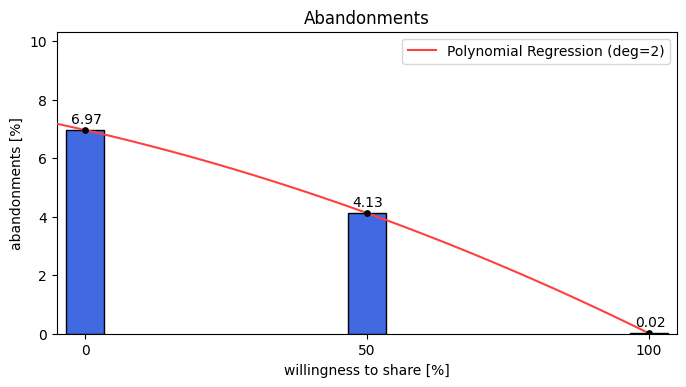

In [15]:
type_graph = 'abandonments'

plt.figure(4, dpi=quality, figsize=size)
plt.bar(x, abandonments, width = (x[-1]-x[0])/15,color='#4169E1',edgecolor='k',zorder=0)
plt.xticks(x)
plt.title('Abandonments')
plt.xlabel(title_x)
plt.ylabel('abandonments [%]')
plt.xlim(x[0]-(x[-1]-x[0])/15,x[-1]+(x[-1]-x[0])/15)
plt.ylim(0,max(abandonments)+max(abandonments)/3)

for i in range(len(x)):
    index = x[i]
    value = abandonments[i]
    plt.text(index-(x[-1]-x[0])/40,value+max(abandonments)/30, str(f'{value:.2f}'))
    
dx=(x[-1]-x[0])/5
if regression == 'log':
    regression_log(x, abandonments, deg, False, 'Abandonments', 'abandonments [%]',dx)
if regression == 'exp':
    regression_exp(x, abandonments, deg, False, 'Abandonments', 'abandonments [%]',dx)
if regression == 'poly':
    regression_poly(x, abandonments, deg, False, 'Abandonments', 'abandonments [%]',dx)

#plt.savefig(f'graphs_{version}/{name_folder}/{type_graph}')

plt.show()
# wild goose chase (concept à étudié, donner par Lynn)

### Occupancy

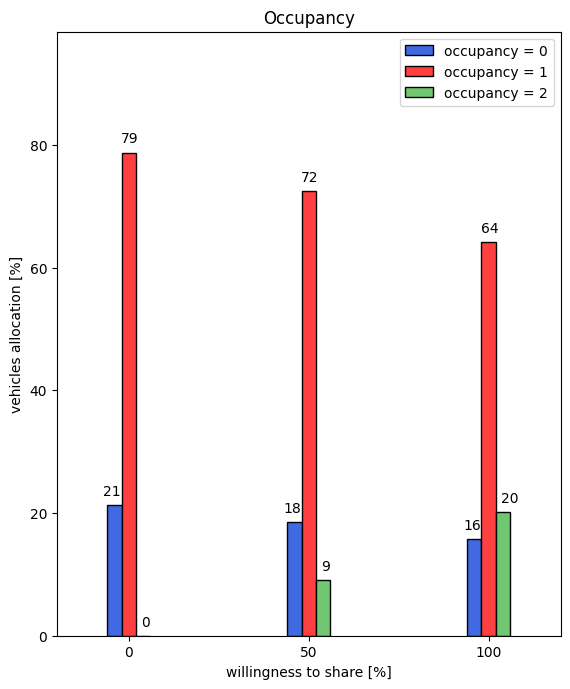

In [16]:
type_graph = 'occupancy'

plt.figure(5, dpi=quality, figsize=size_occupancy)

plt.title('Occupancy')

if len(x)==6:
    plt.bar([i-(x[-1]-x[0])/35 for i in x], occupancies_0, width=(x[-1]-x[0])/35, align='center', label='occupancy = 0',color='#4169E1',edgecolor='k')
    plt.bar(x, occupancies_1, width=(x[-1]-x[0])/35, align='center', label='occupancy = 1',color='#FF4040',edgecolor='k')
    plt.bar([i+(x[-1]-x[0])/35 for i in x], occupancies_2, width=(x[-1]-x[0])/35, align='center', label='occupancy = 2',color='#71C671',edgecolor='k')
    plt.xlabel(title_x)
    plt.ylabel('vehicles allocation [%]')
    plt.xlim(x[0]-(x[-1]-x[0])/10,x[-1]+(x[-1]-x[0])/10)
    plt.ylim(0,max(occupancies_1)+max(occupancies_1)/4)
    plt.xticks(x)

    for i in range(len(occupancies_1)):
        plt.text(x[i]-(x[-1]-x[0])/15,occupancies_0[i]+max(occupancies_1)/50, str(f'{occupancies_0[i]:.0f}'))
        plt.text(x[i]-(x[-1]-x[0])/50,occupancies_1[i]+max(occupancies_1)/50, str(f'{occupancies_1[i]:.0f}'))
        plt.text(x[i]+(x[-1]-x[0])/35,occupancies_2[i]+max(occupancies_1)/50, str(f'{occupancies_2[i]:.0f}'))
else:
    plt.bar([i-(x[-1]-x[0])/25 for i in x], occupancies_0, width=(x[-1]-x[0])/25, align='center', label='occupancy = 0',color='#4169E1',edgecolor='k')
    plt.bar(x, occupancies_1, width=(x[-1]-x[0])/25, align='center', label='occupancy = 1',color='#FF4040',edgecolor='k')
    plt.bar([i+(x[-1]-x[0])/25 for i in x], occupancies_2, width=(x[-1]-x[0])/25, align='center', label='occupancy = 2',color='#71C671',edgecolor='k')
    plt.xlabel(title_x)
    plt.ylabel('vehicles allocation [%]')
    plt.xlim(x[0]-(x[-1]-x[0])/5,x[-1]+(x[-1]-x[0])/5)
    plt.ylim(0,max(occupancies_1)+max(occupancies_1)/4)
    plt.xticks(x)

    for i in range(len(occupancies_1)):
        plt.text(x[i]-(x[-1]-x[0])/14,occupancies_0[i]+max(occupancies_1)/50, str(f'{occupancies_0[i]:.0f}'))
        plt.text(x[i]-(x[-1]-x[0])/45,occupancies_1[i]+max(occupancies_1)/50, str(f'{occupancies_1[i]:.0f}'))
        plt.text(x[i]+(x[-1]-x[0])/30,occupancies_2[i]+max(occupancies_1)/50, str(f'{occupancies_2[i]:.0f}'))

plt.legend(loc='upper right')

#plt.savefig(f'graphs_{version}/{name_folder}/{type_graph}')

plt.show()

In [11]:
print('Résumé des résultats \n','mean_waiting_times :',mean_waiting_times,'\n','mean_detour_times :', mean_detour_times,'\n', 'percentage_sharings :',percentage_sharings, '\n','abandonments :',abandonments, '\n','occupancies_0 :',occupancies_0, '\n','occupancies_1 :',occupancies_1, '\n','occupancies_2 :',occupancies_2)

Résumé des résultats 
 mean_waiting_times : [1.87067196 2.08055902 2.36134136] 
 mean_detour_times : [0.         4.89848052 5.11607164] 
 percentage_sharings : [ 0.         22.92985188 44.84010702] 
 abandonments : [6.96507937 4.12698413 0.01904762] 
 occupancies_0 : [21.25159796 18.47348309 15.72721167] 
 occupancies_1 : [78.74840204 72.44367763 64.12063455] 
 occupancies_2 : [ 0.          9.08283928 20.15215377]
